### Project: Computational models for robot-induced hallucinations in Parkinson’s Disease
### Laboratory of Cognitive Neuroscience - LNCO
### Author: Duarte Rodrigues
##### Script: This document allows to manipulate the .csv (results from the ALL_DB analysis script) that is going to be used to do the statistical analaysis. This means creating separate files to study HC | PD or PD_PH | PD_nPH files between or adding new columns of demographic or psychological assessment info.

##### It is not a continuous code where the last cell depends on all of the previous ones! If something specific was needed I added new cells just to do that task!

In [11]:
''' Loading .csv file and displaying it.'''
import pandas as pd
from IPython.display import display
import os
csv_path = r"D:\_users\Duarte_Projects\ma_new_DB_SingleView_DownCrop-Duarte-2022-07-16\videos\Singleview_Results\final_df.csv"
data = pd.read_csv(csv_path)
display(data)

Unnamed: 0 sub_ID group condition  trial  PH_scale  PH_Y_N  \
0            0   7-14    HC     async      1       0.0       0   
1            1   7-14    HC      sync      2       0.0       0   
2            2   7-15    HC     async      1       2.0       1   
3            3   7-15    HC      sync      2       3.0       1   
4            4   7-16    HC     async      2       0.0       0   
5            5   7-16    HC      sync      1       0.0       0   
6            6   7-17    HC     async      2       5.0       1   
7            7   7-17    HC      sync      1       0.0       0   
8            8   7-19    HC     async      1       0.0       0   
9            9   7-19    HC      sync      2       0.0       0   
10          10   7-25    HC     async      2       1.0       1   
11          11   7-25    HC      sync      1       1.0       1   
12          12   7-26    HC     async      1       1.0       1   
13          13   7-26    HC      sync      2       0.0       0   
14          14   7-28    HC     async      1       0.0       0   
15          15   7-28    HC      sync      2       0.0       0   
16          16   7-33    HC     async      2       6.0       1   
17          17   7-10    PD      sync      1       0.0       0   
18          18   7-11    PD     async      1       0.0       0   
19          19   7-11    PD      sync      2       0.0       0   
20          20   7-12    PD     async      1       3.0       1   
21          21   7-12    PD      sync      2       3.0       1   
22          22    7-1    PD     async      2       0.0       0   
23          23    7-1    PD      sync      1       0.0       0   
24          24   7-20    PD     async      1       0.0       0   
25          25   7-20    PD      sync      2       0.0       0   
26          26   7-21    PD     async      2       0.0       0   
27          27   7-21    PD      sync      1       0.0       0   
28          28   7-23    PD     async      1       2.0       1   
29          29   7-23    PD      sync      2       0.0       0   
30          30   7-27    PD     async      2       2.0       1   
31          31   7-27    PD      sync      1       0.0       0   
32          32   7-29    HC     async      2       0.0       0   
33          33   7-29    HC      sync      1       0.0       0   
34          34    7-2    PD     async      2       0.0       0   
35          35    7-2    PD      sync      1       0.0       0   
36          36   7-31    PD     async      2       0.0       0   
37          37   7-31    PD      sync      1       0.0       0   
38          38   7-34    PD     async      1       0.0       0   
39          39   7-34    PD      sync      2       0.0       0   
40          40   7-35    PD     async      1       0.0       0   
41          41   7-35    PD      sync      2       0.0       0   
42          42   7-39    PD     async      2       0.0       0   
43          43   7-39    PD      sync      1       3.0       1   
44          44    7-4    PD     async      1       0.0       0   
45          45    7-4    PD      sync      2       0.0       0   
46          46    7-5    PD     async      1       0.0       0   
47          47    7-5    PD      sync      2       0.0       0   
48          48    7-6    PD     async      2       1.0       1   
49          49    7-6    PD      sync      1       1.0       1   
50          50    7-7    PD     async      2       0.0       0   
51          51    7-7    PD      sync      1       0.0       0   
52          52    7-8    PD      sync      1       0.0       0   

    finger_freq_pokes  finger_mean_mov  finger_std_mov  ...  elbow_max_amp  \
0            0.386904        66.393226        3.810572  ...       1.269825   
1            0.387463        67.554766        3.562048  ...       1.343214   
2            0.281351        45.233003        2.997545  ...       0.969252   
3            0.416991        56.752830        2.310360  ...       1.123077   
4            0.278352        55.781294        3.9

## Regression plots of the ratings

In [22]:
from matplotlib import pyplot as plt
# creating lists of tuples to do a 4 line plot of speed ~ PH ratings

HC_sync = []
HC_async = []
PD_sync = []
PD_async = []

for row in range(data.shape[0]):
    if data['group'][row] == 'PD':
        if data['condition'][row] =='async':
            PD_async.append((data['finger_avg_speed'][row],data['PH_scale'][row]))
        else:
            PD_sync.append((data['finger_avg_speed'][row],data['PH_scale'][row]))
    else:
        if data['condition'][row] =='async':
            HC_async.append((data['finger_avg_speed'][row],data['PH_scale'][row]))
        else:
            HC_sync.append((data['finger_avg_speed'][row],data['PH_scale'][row]))



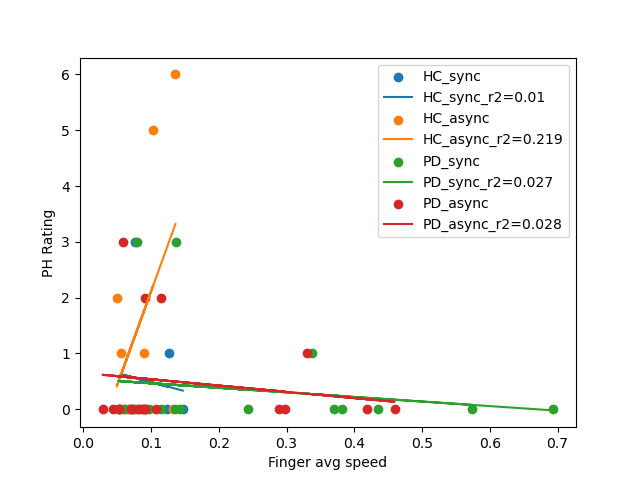

In [69]:
''' In this cell, the previous data is being fitted with a linear regression. 
It does not work because the PH rating is 0 a lot of times, specially for HC.
'''
from scipy import stats
def regression_line(slope, x, intercept):
    line = []
    for i in x:
        line.append(slope * i + intercept)
    
    return line

lists=[HC_sync,HC_async,PD_sync,PD_async]
labels=['HC_sync','HC_async','PD_sync','PD_async']

%matplotlib widget
for lis in lists:
    x=[]
    y=[]
    for a in lis:
        xa = a[0]
        x.append(xa)
        ya = a[1]
        y.append(ya)
    
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    line = regression_line(slope, x, intercept)
    
    plt.scatter(x,y,label=labels[lists.index(lis)])
    plt.plot(x,line,label=labels[lists.index(lis)]+'_r2='+str(round(r**2,3)))
    # if lists.index(lis) == 1:
    #     break
plt.legend()
plt.xlabel('Finger speed')
plt.ylabel('PH Rating')
plt.show()

In [75]:
''' In this cell we research if there is any difference related between the change in speed and chnage sin PH intensity.
Maybe if the speed changes a lot and the PH feels more real, they are correlated.'''

HC = []
PD = []
#delta is (async-sync)

temp_par=''
for row in range(data.shape[0]):
    par_name =  data['sub_ID'][row]
    count_cond = list(data['sub_ID']).count(par_name)

    if count_cond == 2: # there are 2 conditions so the delta can be calculated
        
        #first we get one of the conditions (we dont know which one it is be cause it is randomized if the participant does in the task the async or sync first)
        if data['condition'][row] =='async':
            async_speed = data['finger_avg_speed'][row]
            async_PH_rating = data['PH_scale'][row]
        else:
            sync_speed = data['finger_avg_speed'][row]
            sync_PH_rating = data['PH_scale'][row]
    
    if (par_name == temp_par and count_cond == 2): # if it is still the same participant then we need to get the info about the other condition and then we can get the delta
        delta_speed = async_speed-sync_speed
        delta_rating = async_PH_rating-sync_PH_rating
        if data['group'][row] == 'PD':
            PD.append((delta_speed,delta_rating))
        else:
            HC.append((delta_speed,delta_rating))
            
    elif count_cond==1: # if it just has one condition then we have the speed and rating by themselves

        speed = data['finger_avg_speed'][row]
        PH_rating = data['PH_scale'][row]

        if data['group'][row] == 'PD':
            PD.append((speed,PH_rating))
        else:
            HC.append((speed,PH_rating))

    temp_par = par_name



[(-0.023651124200863696, 0.0), (-0.027581725053788593, -1.0), (0.018828285439289605, 0.0), (-0.0206785349091385, 5.0), (0.0073813148616809, 0.0), (-0.03581979275413259, 0.0), (-0.021149940175329195, 1.0), (-0.014305901210227095, 0.0), (0.1358102039826268, 6.0)]


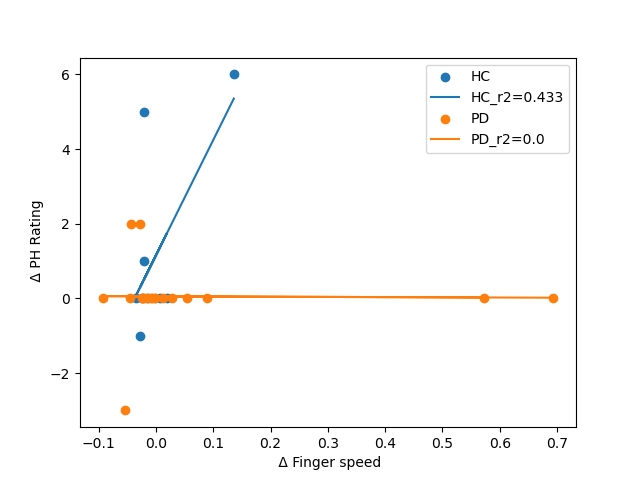

In [78]:
''' In this cell, the previous data is being fitted with a linear regression. 
It does not work because the PH rating is 0 a lot of times, specially for HC.
'''
lists=[HC, PD]
labels=['HC','PD']
%matplotlib widget
for lis in lists:
    x=[]
    y=[]
    for a in lis:
        xa = a[0]
        x.append(xa)
        ya = a[1]
        y.append(ya)
    
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    line = regression_line(slope, x, intercept)
    
    plt.scatter(x,y,label=labels[lists.index(lis)])
    plt.plot(x,line,label=labels[lists.index(lis)]+'_r2='+str(round(r**2,3)))
    # if lists.index(lis) == 1:
    #     break
plt.legend()
plt.xlabel(' Δ Finger speed')
plt.ylabel(' Δ PH Rating')
plt.show()

## New CSV for PD that have PH in their everyday life or for the UPDRS III score - study 2

In [2]:
#remove HC from the table
hc_ind = []
for row in range(data.shape[0]):
    if data['group'][row] == 'HC':
        hc_ind.append(row)

# reset the dataframe index without the removed rows
pd_data = data.drop(hc_ind)
pd_data.reset_index(drop=True,inplace=True)


In [4]:
csv_path_ph = r"D:\_users\Duarte_Projects\Robot-task_questionnaires\Study1\PD_questionnaires_Study1.csv"
quest_df = pd.read_csv(csv_path_ph)

# From the questionnaire data it gets the UPDRS3 score
def get_UPDS3_study1(quest_df, sub):
    
    for i in range(quest_df.shape[0]):
        if quest_df['ID'][i] == sub:
            UPDRS_score = quest_df['UDPRS3-TOTAL'][i]
            
            return UPDRS_score 

updrs3_rating = []

# getting the updrs3 for the subject ID
for row in range(pd_data.shape[0]):
    sub = pd_data['sub_ID'][row]
    last_char=sub[-1]
    sub=sub.replace('_','')
    sub=sub[:-1].replace('0','')
    sub=sub+last_char

    score = get_UPDS3_study1(quest_df, sub)
    updrs3_rating.append(score)
    
# Adds the UPDRS3 data in a new column and then saves the df as .csv - this is a perfect example why this notebook is called manipulating data
ph_data = pd.DataFrame(updrs3_rating, columns=['UPDRSIII_score'])
new_df = pd.concat([pd_data,ph_data], axis=1)

display(new_df)
new_df.to_csv(os.path.dirname(csv_path)+'//onlyPD_dataUPDRS3.csv', index=False)

Unnamed: 0 sub_ID group condition  trial  PH_scale          PH_Y_N  \
0           30  PD_03    PD     Async      2       0.0  not_rob_ind_PH   
1           31  PD_03    PD      Sync      1       0.0  not_rob_ind_PH   
2           32  PD_07    PD      Sync      1       0.0  not_rob_ind_PH   
3           33  PD_08    PD      Sync      1       0.0  not_rob_ind_PH   
4           34  PD_09    PD     Async      1       0.0  not_rob_ind_PH   
5           35  PD_09    PD      Sync      2       0.0  not_rob_ind_PH   
6           36  PD_13    PD     Async      1       0.0  not_rob_ind_PH   
7           37  PD_13    PD      Sync      2       0.0  not_rob_ind_PH   
8           38  PD_14    PD      Sync      1       0.0  not_rob_ind_PH   
9           39  PD_15    PD     Async      2       0.0  not_rob_ind_PH   
10          40  PD_15    PD      Sync      1       0.0  not_rob_ind_PH   
11          41  PD_17    PD     Async      2       5.0      rob_ind_PH   
12          42  PD_17    PD      Sync      1       0.0  not_rob_ind_PH   
13          43  PD_18    PD     Async      2       0.0  not_rob_ind_PH   
14          44  PD_18    PD      Sync      1       0.0  not_rob_ind_PH   
15          45  PD_20    PD     Async      1       0.0  not_rob_ind_PH   
16          46  PD_20    PD      Sync      2       0.0  not_rob_ind_PH   
17          47  PD_22    PD     Async      2       4.0      rob_ind_PH   
18          48  PD_22    PD      Sync      1       3.0      rob_ind_PH   
19          49  PD_28    PD     Async      1       0.0  not_rob_ind_PH   
20          50  PD_28    PD      Sync      2       0.0  not_rob_ind_PH   
21          51  PD_29    PD     Async      1       0.0  not_rob_ind_PH   
22          52  PD_29    PD      Sync      2       0.0  not_rob_ind_PH   
23          53  PD_31    PD     Async      2       0.0  not_rob_ind_PH   
24          54  PD_32    PD     Async      2       0.0  not_rob_ind_PH   
25          55  PD_32    PD      Sync      1       0.0  not_rob_ind_PH   
26          56  PD_34    PD     Async      1       0.0  not_rob_ind_PH   
27          57  PD_35    PD     Async      1       3.0      rob_ind_PH   
28          58  PD_35    PD      Sync      2       0.0  not_rob_ind_PH   
29          59  PD_39    PD     Async      2       5.0      rob_ind_PH   
30          60  PD_40    PD     Async      2       6.0      rob_ind_PH   
31          61  PD_40    PD      Sync      1       0.0  not_rob_ind_PH   

   dailyPH_Y_N Hand_Used Angle_Filmed  ...  elbow_std_speed  elbow_mov_noise  \
0        PD-PH     Right           RD  ...         0.237870        19.375772   
1        PD-PH     Right           RD  ...         0.160196        15.037081   
2        PD-PH     Right           LL  ...              NaN              NaN   
3       PD-nPH     Right           LL  ...              NaN              NaN   
4       PD-nPH      Left           LL  ...         0.032003         1.521394   
5       PD-nPH      Left           LL  ...         0.028168         1.544592   
6       PD-nPH      Left           LL  ...         0.040117         1.753754   
7       PD-nPH      Left           LL  ...         0.070105         1.371421   
8       PD-nPH     Right           LL  ...              NaN              NaN   
9       PD-nPH      Left           LL  ...         0.047062         2.375979   
10      PD-nPH      Left           LL  ...         0.109517         1.573387   
11       PD-PH     Right           LL  ...              NaN              NaN   
12       PD-PH     Right           LL  ...              NaN              NaN   
13      PD-nPH      Left           LL  ...         0.033958         1.223956   
14      PD-nPH      Left           LL  ...         0.030793         1.086355   
15      PD-nPH      Left           LL  ...         0.124750         1.109784   
16      PD-nPH      Left           LL  ...         0.030950         1.084652   
17       PD-PH     Right           LL  ...              NaN              NaN   
18       PD-PH     Right           LL  ..

## Exactly the same process as before, but now for the dailyPH score

In [109]:
csv_path_ph = r"D:\_users\Duarte_Projects\Robot-task_questionnaires\dailyPH_score.csv"
data_ph = pd.read_csv(csv_path_ph)

def get_dailyPH_score(data_ph,sub):
    for i in range(data_ph.shape[0]):
        if data_ph['Sub_ID'][i] == sub:
            return data_ph['dailyPH_scores'][i]

ordered_PHrate = []
ordered_PH_Y_N = []
for row in range(pd_data.shape[0]):
    sub = pd_data['sub_ID'][row]
    score = get_dailyPH_score(data_ph,sub)
    ordered_PHrate.append(score)
    if score == 0:
        ordered_PH_Y_N.append('PD-nPH')
    if score > 0:
        ordered_PH_Y_N.append('PD-PH')
    

ph_datar = pd.DataFrame(ordered_PHrate, columns=['dailyPH_score'])
ph_datayn = pd.DataFrame(ordered_PH_Y_N,columns=['dailyPH_Y_N'])
ph_data = pd.concat([ph_datar,ph_datayn], axis=1)
new_df = pd.concat([pd_data,ph_data], axis=1)
display(new_df)
new_df.to_csv(os.path.dirname(csv_path)+'//dailyPH_all_data.csv', index=False)

Unnamed: 0 sub_ID group condition  trial  PH_scale  PH_Y_N  \
0           17   7-10    PD      sync      1       0.0       0   
1           18   7-11    PD     async      1       0.0       0   
2           19   7-11    PD      sync      2       0.0       0   
3           20   7-12    PD     async      1       3.0       1   
4           21   7-12    PD      sync      2       3.0       1   
5           22    7-1    PD     async      2       0.0       0   
6           23    7-1    PD      sync      1       0.0       0   
7           24   7-20    PD     async      1       0.0       0   
8           25   7-20    PD      sync      2       0.0       0   
9           26   7-21    PD     async      2       0.0       0   
10          27   7-21    PD      sync      1       0.0       0   
11          28   7-23    PD     async      1       2.0       1   
12          29   7-23    PD      sync      2       0.0       0   
13          30   7-27    PD     async      2       2.0       1   
14          31   7-27    PD      sync      1       0.0       0   
15          32   7-29    PD     async      2       0.0       0   
16          33   7-29    PD      sync      1       0.0       0   
17          34    7-2    PD     async      2       0.0       0   
18          35    7-2    PD      sync      1       0.0       0   
19          36   7-31    PD     async      2       0.0       0   
20          37   7-31    PD      sync      1       0.0       0   
21          38   7-34    PD     async      1       0.0       0   
22          39   7-34    PD      sync      2       0.0       0   
23          40   7-35    PD     async      1       0.0       0   
24          41   7-35    PD      sync      2       0.0       0   
25          42   7-39    PD     async      2       0.0       0   
26          43   7-39    PD      sync      1       3.0       1   
27          44    7-4    PD     async      1       0.0       0   
28          45    7-4    PD      sync      2       0.0       0   
29          46    7-5    PD     async      1       0.0       0   
30          47    7-5    PD      sync      2       0.0       0   
31          48    7-6    PD     async      2       1.0       1   
32          49    7-6    PD      sync      1       1.0       1   
33          50    7-7    PD     async      2       0.0       0   
34          51    7-7    PD      sync      1       0.0       0   
35          52    7-8    PD      sync      1       0.0       0   

    finger_freq_pokes  finger_mean_mov  finger_std_mov  ...  elbow_avg_speed  \
0            1.716471        64.331039        2.203768  ...         0.032529   
1            0.337847        44.643570        3.520367  ...         0.018012   
2            0.526317        42.871538        2.383364  ...         0.013024   
3            0.304166        42.587385        1.911801  ...         0.009151   
4            0.688764        40.977367        2.005861  ...         0.006268   
5            0.262074        37.598202        3.207837  ...         0.013573   
6            0.503481        41.783776        2.891378  ...         0.014292   
7            0.385243        53.819771        3.431883  ...         0.010418   
8            0.697097        54.018338        3.507659  ...         0.011818   
9            0.457125        48.897735        1.996633  ...         0.008581   
10           0.320050        53.620733        2.978933  ...         0.008484   
11           0.349921        56.143851        3.028784  ...         0.012551   
12           0.464966        51.065590        2.880256  ...         0.014956   
13           0.390428        42.088663        3.722061  ...         0.013437   
14           0.916207        49.288889        2.186418  ...         0.015038   
15           0.340370        41.104221        3.447333  ...         0.009049   
16           0.446297        40.378325        3.398858  ...         0.008258   
17           0.166743       135.785323       37.300472  ...         0.062951   
18           0.348189        66.591218   

## New CSV for the sociodemographics and UPDRS III - Study 2

In [59]:
''' It loads the df with the motion features and the demo data file - data regarding the demographics fo the participants (age, gender, dominante hand, etc).'''
import pandas as pd
from IPython.display import display
import os
import math
data_csv_path=r"D:\_users\Duarte_Projects\ma_new_DB_SingleView_DownCrop-Duarte-2022-07-16\videos\Singleview_Results\final_df.csv"
demo_csv_path=r"D:\_users\Duarte_Projects\Robot-task_questionnaires\demo_updrs3.csv"

data_df = pd.read_csv(data_csv_path)
demo_df = pd.read_csv(demo_csv_path)

In [25]:
''' This is a confusing code that basically creates a new dataframe with the subject id, PH group, gender, age, pd duration and UPDRS3. 
This data will later be concatenated with the already existing dataframe, by matching the sub_id.'''
first_change=True
for r in range(data_df.shape[0]):
    
    sub_id = data_df.iloc[r]['sub_ID']
    if r == 0:
        temp_sub = sub_id
        
    #This check allows to only insert a new row to the dataframe if it is a new subject
    if sub_id!=temp_sub: # this won't happen on the first iteration
        if temp_sub!='7-29': # this subject is badly labeled in the demographic file - it was a mess just move on - it is solved!
            if first_change:
                stat_df = pd.DataFrame(demo_dict, index=[0])
                first_change =False
            else:
                demo_final = pd.DataFrame(demo_dict, index=[0])
                stat_df = pd.concat([stat_df, demo_final])
                stat_df.reset_index(drop=True,inplace=True)

    demo_dict = dict()
    demo_dict['sub_ID'] = data_df.iloc[r]['sub_ID']
    demo_dict['PH_Group'] = data_df.iloc[r]['dailyPH_Y_N']

    for i in range(demo_df.shape[0]):
        if demo_df.iloc[i]['PARTICIPANT CODE'] == sub_id and 'ENROLLMENT' in demo_df.iloc[i]['Event Name']:# and demo_df.iloc[i+1]['Complete?_20'] == 'Complete':
            demo_dict['Gender'] = demo_df.iloc[i]['Sex_4']
            demo_dict['Age'] = demo_df.iloc[i]['Age at Visit _3']
            demo_dict['PD_duration'] = demo_df.iloc[i]['Duration of PD']

        elif demo_df.iloc[i]['PARTICIPANT CODE'] == sub_id and 'PSY & NEUROPSY' in demo_df.iloc[i]['Event Name']:# and demo_df.iloc[i]['Complete?_20'] == 'Complete':
            demo_dict['UPDRS_III_score'] = demo_df.iloc[i]['UPDRS PART III (TOTAL SCORE)']
        
        # else:
        #     print('The particpant {} is not on the demo file.'.format(sub_id))

    temp_sub = sub_id
display(stat_df) # JUST FOR PD
    

sub_ID PH_Group  Gender   Age  PD_duration  UPDRS_III_score
0    7-10   PD-nPH    Male  63.0         16.0             22.0
1    7-11   PD-nPH    Male  63.0         13.0             20.0
2    7-12   PD-nPH    Male  58.0          8.0             15.0
3     7-1    PD-PH  Female  70.0          6.0             13.0
4    7-20   PD-nPH    Male  69.0          5.0             17.0
5    7-21   PD-nPH    Male  71.0          7.0             15.0
6    7-23   PD-nPH    Male  56.0          6.0              NaN
7    7-27    PD-PH    Male  70.0          9.0              6.0
8     7-2    PD-PH    Male  73.0          4.0             27.0
9    7-31   PD-nPH    Male  66.0          6.0              NaN
10   7-34   PD-nPH    Male  81.0          3.0             20.0
11   7-35   PD-nPH  Female  74.0         16.0              NaN
12   7-39   PD-nPH    Male  72.0          5.0              NaN
13    7-4    PD-PH    Male  55.0          6.0             15.0
14    7-5   PD-nPH    Male  71.0          9.0             16.0
15    7-6    PD-PH    Male  72.0          3.0              5.0
16    7-7    PD-PH  Female  79.0          7.0             16.0

In [26]:
stat_df.to_csv(os.path.dirname(data_csv_path) + '//demographics_PD.csv') # saving the previous df as a .csv

In [60]:
''' Here it is the same process but taking the Healthy controls into account'''

for r in range(data_df.shape[0]):
    
    sub_id = data_df.iloc[r]['sub_ID']
    group = data_df.iloc[r]['group']
    # if group == 'HC':
    #     gr = 'Healthy control'
    # elif group == 'PD':
    #     gr ="Parkinson's Disease"

    demo_dict = dict()
    
    # demo_dict['sub_ID'] = data_df.iloc[r]['sub_ID']
    # demo_dict['PH_Group'] = data_df.iloc[r]['dailyPH_Y_N']

    for i in range(demo_df.shape[0]):
        if demo_df.iloc[i]['PARTICIPANT CODE'] == sub_id and 'ENROLLMENT' in demo_df.iloc[i]['Event Name'] and "Parkinson's Disease" in demo_df.iloc[i]['Event Name']:# and demo_df.iloc[i+1]['Complete?_20'] == 'Complete':
            demo_dict['Gender'] = demo_df.iloc[i]['Sex_4']
            demo_dict['Age'] = demo_df.iloc[i]['Age at Visit _3']
            demo_dict['PD_duration'] = demo_df.iloc[i]['Duration of PD']

        elif demo_df.iloc[i]['PARTICIPANT CODE'] == sub_id and 'PSY & NEUROPSY' in demo_df.iloc[i]['Event Name'] and "Parkinson's Disease" in demo_df.iloc[i]['Event Name']:# and demo_df.iloc[i]['Complete?_20'] == 'Complete':
            demo_dict['UPDRS_III_score'] = demo_df.iloc[i]['UPDRS PART III (TOTAL SCORE)']
        
        elif demo_df.iloc[i]['PARTICIPANT CODE'] == sub_id and 'ENROLLMENT' in demo_df.iloc[i]['Event Name'] and 'Healthy control' in demo_df.iloc[i]['Event Name']:# and demo_df.iloc[i+1]['Complete?_20'] == 'Complete':
            demo_dict['Gender'] = demo_df.iloc[i]['Sex']
            demo_dict['Age'] = demo_df.iloc[i]['Age at Visit ']
            demo_dict['UPDRS_III_score'] = math.nan
            demo_dict['PD_duration'] = math.nan
                
    if r == 0:
        stat_df = pd.DataFrame(demo_dict, index=[0])
    else:

        demo_final = pd.DataFrame(demo_dict, index=[0])
        stat_df = pd.concat([stat_df, demo_final])
        stat_df.reset_index(drop=True,inplace=True)
        
display(stat_df)


Gender   Age  UPDRS_III_score  PD_duration
0     Male  60.0              NaN          NaN
1     Male  60.0              NaN          NaN
2   Female  70.0              NaN          NaN
3   Female  70.0              NaN          NaN
4     Male  73.0              NaN          NaN
5     Male  73.0              NaN          NaN
6     Male  76.0              1.0          8.0
7     Male  76.0              1.0          8.0
8   Female  58.0              NaN          NaN
9   Female  58.0              NaN          NaN
10    Male  71.0              NaN          NaN
11    Male  71.0              NaN          NaN
12    Male  72.0              NaN          NaN
13    Male  72.0              NaN          NaN
14    Male  75.0              NaN          NaN
15    Male  75.0              NaN          NaN
16    Male  67.0              NaN          NaN
17    Male  63.0             22.0         16.0
18    Male  63.0             20.0         13.0
19    Male  63.0             20.0         13.0
20    Male  58.0             15.0          8.0
21    Male  58.0             15.0          8.0
22  Female  70.0             13.0          6.0
23  Female  70.0             13.0          6.0
24    Male  69.0             17.0          5.0
25    Male  69.0             17.0          5.0
26    Male  71.0             15.0          7.0
27    Male  71.0             15.0          7.0
28    Male  56.0              NaN          6.0
29    Male  56.0              NaN          6.0
30    Male  70.0              6.0          9.0
31    Male  70.0              6.0          9.0
32  Female  81.0              NaN          NaN
33  Female  81.0              NaN          NaN
34    Male  73.0             27.0          4.0
35    Male  73.0             27.0          4.0
36    Male  66.0              NaN          6.0
37    Male  66.0              NaN          6.0
38    Male  81.0             20.0          3.0
39    Male  81.0             20.0          3.0
40  Female  74.0              NaN         16.0
41  Female  74.0              NaN         16.0
42    Male  72.0              NaN          5.0
43    Male  72.0              NaN          5.0
44    Male  55.0             15.0          6.0
45    Male  55.0             15.0          6.0
46    Male  71.0             16.0          9.0
47    Male  71.0             16.0          9.0
48    Male  72.0              5.0          3.0
49    Male  72.0              5.0          3.0
50  Female  79.0             16.0          7.0
51  Female  79.0             16.0          7.0
52    Male  74.0             29.0         20.0

In [62]:
''' Here a final df is created where the new stat_df is concatenated/added to the data_df'''

data_df.reset_index(drop=True,inplace=True)
stat_df.reset_index(drop=True,inplace=True)
save_df = pd.concat([data_df, stat_df], axis=1)

# when doing this step there was a problem witha missing row/participant and I was tired so i fixed it by hand by adding it to the end
li_ind = range(0,16)
miss_row = save_df.drop(li_ind)
miss_row.reset_index(drop=True,inplace=True)
li_ind1 = range(1,miss_row.shape[0])
miss_row = miss_row.drop(li_ind1)

display(miss_row)
#drop repeated
save_df = save_df.drop(save_df[save_df.condition == 'async'].index)
save_df = pd.concat([save_df, miss_row], axis=0)
save_df.reset_index(drop=True,inplace=True)
display(save_df)
save_df.to_csv(os.path.dirname(data_csv_path) + '//final_df_demo_1sub.csv') # dinal df with all of the information together ready to go to R or Jasp


Unnamed: 0 sub_ID group condition  trial  PH_scale  PH_Y_N  \
0          16   7-33    HC     async      2       6.0       1   

   finger_freq_pokes  finger_mean_mov  finger_std_mov  ...  shoulder_mean_mov  \
0           0.357538        38.933065        4.870804  ...          20.079191   

   shoulder_std_mov  shoulder_max_amp  shoulder_avg_amp  shoulder_avg_speed  \
0          2.257001          9.312642          5.156914            0.103356   

   shoulder_std_speed  Gender   Age  UPDRS_III_score  PD_duration  
0            0.053048    Male  67.0              NaN          NaN  

[1 rows x 36 columns]

Unnamed: 0 sub_ID group condition  trial  PH_scale  PH_Y_N  \
0            1   7-14    HC      sync      2       0.0       0   
1            3   7-15    HC      sync      2       3.0       1   
2            5   7-16    HC      sync      1       0.0       0   
3            7   7-17    HC      sync      1       0.0       0   
4            9   7-19    HC      sync      2       0.0       0   
5           11   7-25    HC      sync      1       1.0       1   
6           13   7-26    HC      sync      2       0.0       0   
7           15   7-28    HC      sync      2       0.0       0   
8           17   7-10    PD      sync      1       0.0       0   
9           19   7-11    PD      sync      2       0.0       0   
10          21   7-12    PD      sync      2       3.0       1   
11          23    7-1    PD      sync      1       0.0       0   
12          25   7-20    PD      sync      2       0.0       0   
13          27   7-21    PD      sync      1       0.0       0   
14          29   7-23    PD      sync      2       0.0       0   
15          31   7-27    PD      sync      1       0.0       0   
16          33   7-29    HC      sync      1       0.0       0   
17          35    7-2    PD      sync      1       0.0       0   
18          37   7-31    PD      sync      1       0.0       0   
19          39   7-34    PD      sync      2       0.0       0   
20          41   7-35    PD      sync      2       0.0       0   
21          43   7-39    PD      sync      1       3.0       1   
22          45    7-4    PD      sync      2       0.0       0   
23          47    7-5    PD      sync      2       0.0       0   
24          49    7-6    PD      sync      1       1.0       1   
25          51    7-7    PD      sync      1       0.0       0   
26          52    7-8    PD      sync      1       0.0       0   
27          16   7-33    HC     async      2       6.0       1   

    finger_freq_pokes  finger_mean_mov  finger_std_mov  ...  \
0            0.387463        67.554766        3.562048  ...   
1            0.416991        56.752830        2.310360  ...   
2            0.316634        53.459327        2.248403  ...   
3            0.671236        51.796953        2.265204  ...   
4            0.430450        41.710202        1.801389  ...   
5            0.638227        54.079328        2.926990  ...   
6            0.250330        56.923391        4.163895  ...   
7            0.607171        56.511997        4.925511  ...   
8            1.716471        64.331039        2.203768  ...   
9            0.526317        42.871538        2.383364  ...   
10           0.688764        40.977367        2.005861  ...   
11           0.503481        41.783776        2.891378  ...   
12           0.697097        54.018338        3.507659  ...   
13           0.320050        53.620733        2.978933  ...   
14           0.464966        51.065590        2.880256  ...   
15           0.916207        49.288889        2.186418  ...   
16           0.446297        40.378325        3.398858  ...   
17           0.348189        66.591218        3.486672  ...   
18           0.658347        35.963999        3.875891  ...   
19           0.316730        38.093572        2.768314  ...   
20           0.623443        34.354004        2.806695  ...   
21           0.955357        37.858598        3.055474  ...   
22           0.646501        71.271885        2.481054  ...   
23           0.733513        80.781037        2.317680  ...   
24           0.487157        76.045585        2.992802  ...   
25           0.680605        47.111730        3.034102  ...   
26           0.857401        71.308894        3.364057  ...   
27           0.357538        38.933065        4.870804  ...   

    shoulder_mean_mov  shoulder_std_mov  shoulder_max_amp  shoulder_avg_amp  \
0           34.852214          1.976347          6.847327          2.846590   
1           29.135933          1.507153          5.907588          3.256994   
2           22.233554   

## Sociodemographics for the MOCA - study 2

In [32]:
import pandas as pd
from IPython.display import display
import os
import math
data_csv_path=r"D:\_users\Duarte_Projects\ma_new_DB_SingleView_DownCrop-Duarte-2022-07-16\videos\Singleview_Results\final_df_demo_1sub.csv"
demo_csv_path=r"D:\_users\Duarte_Projects\Robot-task_questionnaires\missing_demoDta_hc_v_spd.csv"

data_df = pd.read_csv(data_csv_path)
demo_df = pd.read_csv(demo_csv_path)

In [15]:
display(data_df)

Unnamed: 0.1  Unnamed: 0 sub_ID group condition  trial  PH_scale  PH_Y_N  \
0              0           1   7-14    HC      sync      2       0.0       0   
1              1           3   7-15    HC      sync      2       3.0       1   
2              2           5   7-16    HC      sync      1       0.0       0   
3              3           7   7-17    HC      sync      1       0.0       0   
4              4           9   7-19    HC      sync      2       0.0       0   
5              5          11   7-25    HC      sync      1       1.0       1   
6              6          13   7-26    HC      sync      2       0.0       0   
7              7          15   7-28    HC      sync      2       0.0       0   
8              8          17   7-10    PD      sync      1       0.0       0   
9              9          19   7-11    PD      sync      2       0.0       0   
10            10          21   7-12    PD      sync      2       3.0       1   
11            11          23    7-1    PD      sync      1       0.0       0   
12            12          25   7-20    PD      sync      2       0.0       0   
13            13          27   7-21    PD      sync      1       0.0       0   
14            14          29   7-23    PD      sync      2       0.0       0   
15            15          31   7-27    PD      sync      1       0.0       0   
16            16          33   7-29    HC      sync      1       0.0       0   
17            17          35    7-2    PD      sync      1       0.0       0   
18            18          37   7-31    PD      sync      1       0.0       0   
19            19          39   7-34    PD      sync      2       0.0       0   
20            20          41   7-35    PD      sync      2       0.0       0   
21            21          43   7-39    PD      sync      1       3.0       1   
22            22          45    7-4    PD      sync      2       0.0       0   
23            23          47    7-5    PD      sync      2       0.0       0   
24            24          49    7-6    PD      sync      1       1.0       1   
25            25          51    7-7    PD      sync      1       0.0       0   
26            26          52    7-8    PD      sync      1       0.0       0   
27            27          16   7-33    HC     async      2       6.0       1   

    finger_freq_pokes  finger_mean_mov  ...  shoulder_mean_mov  \
0            0.387463        67.554766  ...          34.852214   
1            0.416991        56.752830  ...          29.135933   
2            0.316634        53.459327  ...          22.233554   
3            0.671236        51.796953  ...          24.541105   
4            0.430450        41.710202  ...          25.029819   
5            0.638227        54.079328  ...          29.021667   
6            0.250330        56.923391  ...          26.522999   
7            0.607171        56.511997  ...          26.828588   
8            1.716471        64.331039  ...          31.197924   
9            0.526317        42.871538  ...          15.111676   
10           0.688764        40.977367  ...          17.933397   
11           0.503481        41.783776  ...          17.490252   
12           0.697097        54.018338  ...          22.592083   
13           0.320050        53.620733  ...          27.142415   
14           0.464966        51.065590  ...          21.643283   
15           0.916207        49.288889  ...          19.285588   
16           0.446297        40.378325  ...          19.613375   
17           0.348189        66.591218  ...          42.376910   
18           0.658347        35.963999  ...          15.740103   
19           0.316730        38.093572  ...          19.189567   
20           0.623443        34.354004  ...          14.871707   
21           0.955357        37.858598  ...          13.275362   
22           0.646501        71.271885  ...          40.657402   
23           0.733513        80.781037  ...          39.497345   
24           0.487157        76.0

In [33]:
''' EXACTLY same process as before but now for the MoCA and LEDD data - dont need the sub_id because it is on the rigtht order'''
for r in range(data_df.shape[0]):
    
    sub_id = data_df.iloc[r]['sub_ID']
    group = data_df.iloc[r]['group']
    # if group == 'HC':
    #     gr = 'Healthy control'
    # elif group == 'PD':
    #     gr ="Parkinson's Disease"

    demo_dict = dict()
    
    # demo_dict['sub_ID'] = data_df.iloc[r]['sub_ID']
    # demo_dict['PH_Group'] = data_df.iloc[r]['dailyPH_Y_N']

    for i in range(demo_df.shape[0]):
        if demo_df.iloc[i]['record_id'] == sub_id and 'enrollment' in demo_df.iloc[i]['redcap_event_name']:# and demo_df.iloc[i+1]['Complete?_20'] == 'Complete':
            demo_dict['LEDD'] = demo_df.iloc[i]['total_ledd']
            demo_dict['MoCA'] = demo_df.iloc[i]['moca_total']

                
    if r == 0:
        stat_df = pd.DataFrame(demo_dict, index=[0])
    else:

        demo_final = pd.DataFrame(demo_dict, index=[0])
        stat_df = pd.concat([stat_df, demo_final])
        stat_df.reset_index(drop=True,inplace=True)
        
display(stat_df)

LEDD  MoCA
0       NaN  30.0
1       NaN  30.0
2       NaN  29.0
3   1510.00  24.0
4       NaN  28.0
5       NaN  26.0
6       NaN  26.0
7       NaN  26.0
8   1614.00  26.0
9    985.50  23.0
10   625.00  27.0
11  1175.00  24.0
12   300.00  29.0
13   749.70  25.0
14   352.50  29.0
15      NaN  27.0
16      NaN  26.0
17  1000.00  23.0
18   425.00  27.0
19      NaN  28.0
20   680.00  24.0
21   990.00  23.0
22  2326.00  27.0
23  1360.00  30.0
24   380.00  26.0
25  1900.00  28.0
26  1163.75  28.0
27      NaN  29.0

In [45]:
data_df.reset_index(drop=True,inplace=True)
stat_df.reset_index(drop=True,inplace=True)
save_df = pd.concat([data_df, stat_df], axis=1)
# li_ind = range(0,16)
# miss_row = save_df.drop(li_ind)
# miss_row.reset_index(drop=True,inplace=True)
# li_ind1 = range(1,miss_row.shape[0])
# miss_row = miss_row.drop(li_ind1)

miss_row = pd.DataFrame((save_df.iloc[-1,:])).T
# display(miss_row)
#drop repeated
save_df = save_df.drop(save_df[save_df.condition == 'async'].index)
save_df = pd.concat([save_df, miss_row], axis=0)
save_df.reset_index(drop=True,inplace=True)
display(save_df)
save_df.to_csv(os.path.dirname(data_csv_path) + '//final_df_complete_demographics.csv') # new file even more complete - compare PD vs HC

Unnamed: 0.1 Unnamed: 0 sub_ID group condition trial PH_scale PH_Y_N  \
0             0          1   7-14    HC      sync     2      0.0      0   
1             1          3   7-15    HC      sync     2      3.0      1   
2             2          5   7-16    HC      sync     1      0.0      0   
3             3          7   7-17    HC      sync     1      0.0      0   
4             4          9   7-19    HC      sync     2      0.0      0   
5             5         11   7-25    HC      sync     1      1.0      1   
6             6         13   7-26    HC      sync     2      0.0      0   
7             7         15   7-28    HC      sync     2      0.0      0   
8             8         17   7-10    PD      sync     1      0.0      0   
9             9         19   7-11    PD      sync     2      0.0      0   
10           10         21   7-12    PD      sync     2      3.0      1   
11           11         23    7-1    PD      sync     1      0.0      0   
12           12         25   7-20    PD      sync     2      0.0      0   
13           13         27   7-21    PD      sync     1      0.0      0   
14           14         29   7-23    PD      sync     2      0.0      0   
15           15         31   7-27    PD      sync     1      0.0      0   
16           16         33   7-29    HC      sync     1      0.0      0   
17           17         35    7-2    PD      sync     1      0.0      0   
18           18         37   7-31    PD      sync     1      0.0      0   
19           19         39   7-34    PD      sync     2      0.0      0   
20           20         41   7-35    PD      sync     2      0.0      0   
21           21         43   7-39    PD      sync     1      3.0      1   
22           22         45    7-4    PD      sync     2      0.0      0   
23           23         47    7-5    PD      sync     2      0.0      0   
24           24         49    7-6    PD      sync     1      1.0      1   
25           25         51    7-7    PD      sync     1      0.0      0   
26           26         52    7-8    PD      sync     1      0.0      0   
27           27         16   7-33    HC     async     2      6.0      1   

   finger_freq_pokes finger_mean_mov  ... shoulder_max_amp shoulder_avg_amp  \
0           0.387463       67.554766  ...         6.847327          2.84659   
1           0.416991        56.75283  ...         5.907588         3.256994   
2           0.316634       53.459327  ...         5.209628         3.287499   
3           0.671236       51.796953  ...         3.973284         2.116976   
4            0.43045       41.710202  ...         3.176158         1.194891   
5           0.638227       54.079328  ...         6.667895         3.356255   
6            0.25033       56.923391  ...        19.341543         3.570599   
7           0.607171       56.511997  ...         9.078428         4.561124   
8           1.716471       64.331039  ...        14.175209         5.497724   
9           0.526317       42.871538  ...           4.7215         2.752551   
10          0.688764       40.977367  ...         5.110629         2.408957   
11          0.503481       41.783776  ...         4.604926         2.326041   
12          0.697097       54.018338  ...         6.259657         3.071111   
13           0.32005       53.620733  ...         6.964439         4.469207   
14          0.464966        51.06559  ...         7.140969         3.676611   
15          0.916207       49.288889  ...         5.693369         3.216238   
16          0.446297       40.378325  ...         3.769422         1.958042   
17          0.348189       66.591218  ...         7.632852         4.971748   
18          0.658347       35.963999  ...         4.270539         2.234299   
19           0.31673       38.093572  ...         6.617884         3.494846   
20          0.623443       34.354004  ...         2.699465         1.076825   
21          0.955357       37.858598  ...         4.476392         2.475398   
22        

## Creating a new .csv just to compare PD_PH | PD_nPH

In [52]:
''' Same process as before, but in the final df there will be only PD and they will be divided between PD_PH (score>0) and PD_nPH (score=0)'''

data_complete_path=r"D:\_users\Duarte_Projects\ma_new_DB_SingleView_DownCrop-Duarte-2022-07-16\videos\Singleview_Results\final_df_complete_demographics.csv" #different from above because 7-17 was manually corrected
csv_path_ph = r"D:\_users\Duarte_Projects\Robot-task_questionnaires\dailyPH_score.csv"

data_complete_df = pd.read_csv(data_complete_path)
data_ph = pd.read_csv(csv_path_ph)

def get_dailyPH_score(data_ph,sub):
    for i in range(data_ph.shape[0]):
        if data_ph['Sub_ID'][i] == sub:
            return data_ph['dailyPH_scores'][i]

ordered_PHrate = []
ordered_PH_Y_N = []
for row in range(data_complete_df.shape[0]):
    sub = data_complete_df['sub_ID'][row]
    score = get_dailyPH_score(data_ph,sub)
    
    if score == None:
        print(sub)
        ordered_PHrate.append(math.nan)
        ordered_PH_Y_N.append(math.nan)
    elif score >=0:
        ordered_PHrate.append(score)
        if score == 0:
            ordered_PH_Y_N.append('PD-nPH')
        if score > 0:
            ordered_PH_Y_N.append('PD-PH')
    

ph_datar = pd.DataFrame(ordered_PHrate, columns=['dailyPH_score'])
ph_datayn = pd.DataFrame(ordered_PH_Y_N,columns=['dailyPH_Y_N'])
ph_data = pd.concat([ph_datar,ph_datayn], axis=1)
new_df = pd.concat([data_complete_df,ph_data], axis=1) # concatenating all the data to the complete one
display(new_df)

new_df = new_df.drop(new_df[new_df.group == 'HC'].index) #dropping all the HC rows

display(new_df)
new_df.to_csv(os.path.dirname(data_complete_path)+'//Complete_Demographics_PD_PH.csv', index=False) # Comapre PD_PH vs PD_nPH

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 sub_ID group condition  trial  \
0              0             0           1   7-14    HC      sync      2   
1              1             1           3   7-15    HC      sync      2   
2              2             2           5   7-16    HC      sync      1   
3              3             3           7   7-17    PD      sync      1   
4              4             4           9   7-19    HC      sync      2   
5              5             5          11   7-25    HC      sync      1   
6              6             6          13   7-26    HC      sync      2   
7              7             7          15   7-28    HC      sync      2   
8              8             8          17   7-10    PD      sync      1   
9              9             9          19   7-11    PD      sync      2   
10            10            10          21   7-12    PD      sync      2   
11            11            11          23    7-1    PD      sync      1   
12            12            12          25   7-20    PD      sync      2   
13            13            13          27   7-21    PD      sync      1   
14            14            14          29   7-23    PD      sync      2   
15            15            15          31   7-27    PD      sync      1   
16            16            16          33   7-29    HC      sync      1   
17            17            17          35    7-2    PD      sync      1   
18            18            18          37   7-31    PD      sync      1   
19            19            19          39   7-34    PD      sync      2   
20            20            20          41   7-35    PD      sync      2   
21            21            21          43   7-39    PD      sync      1   
22            22            22          45    7-4    PD      sync      2   
23            23            23          47    7-5    PD      sync      2   
24            24            24          49    7-6    PD      sync      1   
25            25            25          51    7-7    PD      sync      1   
26            26            26          52    7-8    PD      sync      1   
27            27            27          16   7-33    HC     async      2   

    PH_scale  PH_Y_N  finger_freq_pokes  ...  shoulder_avg_speed  \
0        0.0       0           0.387463  ...            0.043366   
1        3.0       1           0.416991  ...            0.049025   
2        0.0       0           0.316634  ...            0.043579   
3        0.0       0           0.671236  ...            0.055523   
4        0.0       0           0.430450  ...            0.028735   
5        1.0       1           0.638227  ...            0.078744   
6        0.0       0           0.250330  ...            0.031378   
7        0.0       0           0.607171  ...            0.091761   
8        0.0       0           1.716471  ...            0.289452   
9        0.0       0           0.526317  ...            0.046906   
10       3.0       1           0.688764  ...            0.052457   
11       0.0       0           0.503481  ...            0.039381   
12       0.0       0           0.697097  ...            0.074978   
13       0.0       0           0.320050  ...            0.055574   
14       0.0       0           0.464966  ...            0.061085   
15       0.0       0           0.916207  ...            0.084273   
16       0.0       0           0.446297  ...            0.037530   
17       0.0       0           0.348189  ...            0.151937   
18       0.0       0           0.658347  ...            0.043926   
19       0.0       0           0.316730  ...            0.040568   
20       0.0       0           0.623443  ...            0.020908   
21       3.0       1           0.955357  ...            0.078709   
22       0.0       0           0.646501  ...            0.310592   
23       0.0       0           0.733513  ...            0.351982   
24       1.0       1           0.487157  ...            0.260317   
25       0.0       0           

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 sub_ID group condition  trial  \
3              3             3           7   7-17    PD      sync      1   
8              8             8          17   7-10    PD      sync      1   
9              9             9          19   7-11    PD      sync      2   
10            10            10          21   7-12    PD      sync      2   
11            11            11          23    7-1    PD      sync      1   
12            12            12          25   7-20    PD      sync      2   
13            13            13          27   7-21    PD      sync      1   
14            14            14          29   7-23    PD      sync      2   
15            15            15          31   7-27    PD      sync      1   
17            17            17          35    7-2    PD      sync      1   
18            18            18          37   7-31    PD      sync      1   
19            19            19          39   7-34    PD      sync      2   
20            20            20          41   7-35    PD      sync      2   
21            21            21          43   7-39    PD      sync      1   
22            22            22          45    7-4    PD      sync      2   
23            23            23          47    7-5    PD      sync      2   
24            24            24          49    7-6    PD      sync      1   
25            25            25          51    7-7    PD      sync      1   
26            26            26          52    7-8    PD      sync      1   

    PH_scale  PH_Y_N  finger_freq_pokes  ...  shoulder_avg_speed  \
3        0.0       0           0.671236  ...            0.055523   
8        0.0       0           1.716471  ...            0.289452   
9        0.0       0           0.526317  ...            0.046906   
10       3.0       1           0.688764  ...            0.052457   
11       0.0       0           0.503481  ...            0.039381   
12       0.0       0           0.697097  ...            0.074978   
13       0.0       0           0.320050  ...            0.055574   
14       0.0       0           0.464966  ...            0.061085   
15       0.0       0           0.916207  ...            0.084273   
17       0.0       0           0.348189  ...            0.151937   
18       0.0       0           0.658347  ...            0.043926   
19       0.0       0           0.316730  ...            0.040568   
20       0.0       0           0.623443  ...            0.020908   
21       3.0       1           0.955357  ...            0.078709   
22       0.0       0           0.646501  ...            0.310592   
23       0.0       0           0.733513  ...            0.351982   
24       1.0       1           0.487157  ...            0.260317   
25       0.0       0           0.680605  ...            0.194329   
26       0.0       0           0.857401  ...            0.499769   

    shoulder_std_speed  Gender   Age  UPDRS_III_score  PD_duration     LEDD  \
3             0.030788    Male  76.0              1.0          8.0  1510.00   
8             0.188835    Male  63.0             22.0         16.0  1614.00   
9             0.036138    Male  63.0             20.0         13.0   985.50   
10            0.029952    Male  58.0             15.0          8.0   625.00   
11            0.022435  Female  70.0             13.0          6.0  1175.00   
12            0.047019    Male  69.0             17.0          5.0   300.00   
13            0.042920    Male  71.0             15.0          7.0   749.70   
14            0.048154    Male  56.0              NaN          6.0   352.50   
15            0.049315    Male  70.0              6.0          9.0      NaN   
17            0.101077    Male  73.0             27.0          4.0  1000.00   
18            0.030098    Male  66.0              NaN          6.0   425.00   
19            0.028576    Male  81.0             20.0          3.0      NaN   
20            0.016425  Female  74.0              NaN         16.0   680.00   
21            0.

## Same kind of manipulations, but now for study 1

In [120]:
import pandas as pd
from IPython.display import display
import os
import math
data_csv_path=r"D:\_users\Duarte_Projects\ma_FullModel-Duarte-2022-07-01\videos\Fullmodel_Results\Study1_2trialdf.csv"
demo_csv_path=r"D:\_users\Duarte_Projects\Robot-task_questionnaires\Study1\Organzied_complete_Demographics.csv" # this demographic file has different configuartion then the one before of study2

data_df = pd.read_csv(data_csv_path)
demo_df = pd.read_csv(demo_csv_path)

display(data_df)


Unnamed: 0 sub_ID group condition  trial  PH_scale          PH_Y_N  \
0            0  HC_11    HC     Async      2       0.0  not_rob_ind_PH   
1            1  HC_11    HC      Sync      1       0.0  not_rob_ind_PH   
2            2  HC_12    HC     Async      1       5.0      rob_ind_PH   
3            3  HC_12    HC      Sync      2       5.0      rob_ind_PH   
4            4  HC_13    HC     Async      1       3.0      rob_ind_PH   
..         ...    ...   ...       ...    ...       ...             ...   
57          57  PD_35    PD     Async      1       3.0      rob_ind_PH   
58          58  PD_35    PD      Sync      2       0.0  not_rob_ind_PH   
59          59  PD_39    PD     Async      2       5.0      rob_ind_PH   
60          60  PD_40    PD     Async      2       6.0      rob_ind_PH   
61          61  PD_40    PD      Sync      1       0.0  not_rob_ind_PH   

   dailyPH_Y_N Hand_Used Angle_Filmed  ...  elbow_avg_speed  elbow_std_speed  \
0       PD-nPH      Left           LL  ...         0.072939         0.072310   
1       PD-nPH      Left           LL  ...         0.068283         0.063260   
2       PD-nPH      Left           LD  ...         0.016058         0.025814   
3       PD-nPH      Left           LD  ...         0.010586         0.020538   
4       PD-nPH      Left           LD  ...         0.008885         0.014681   
..         ...       ...          ...  ...              ...              ...   
57      PD-nPH     Right           RD  ...         0.037449         0.062027   
58      PD-nPH     Right           RD  ...         0.026602         0.024453   
59       PD-PH      Left           RL  ...              NaN              NaN   
60       PD-PH      Left           RL  ...         0.004401         0.030957   
61       PD-PH      Left           RL  ...              NaN              NaN   

    elbow_mov_noise  shoulder_mean_mov  shoulder_std_mov  shoulder_max_amp  \
0          1.705738          58.975761          1.620391          5.994345   
1          1.349725          56.813579          0.815307          5.085480   
2          1.243765          64.817864          2.348941          6.819921   
3          1.431361          73.962783          1.496262          5.346875   
4          0.886797          56.763596          1.178613          4.154892   
..              ...                ...               ...               ...   
57         2.431748          86.430974          2.171663          7.906213   
58         1.996854          84.697299          1.588070          6.215306   
59              NaN                NaN               NaN               NaN   
60         1.285536          94.839726          0.503730          2.509535   
61              NaN          94.795643          0.287533          1.792460   

    shoulder_avg_amp  shoulder_avg_speed  shoulder_std_speed  \
0           3.667400            0.121295            0.082548   
1           2.782559            0.171740            0.094825   
2           5.913024            0.122447            0.072321   
3           3.559151            0.093743            0.066136   
4           3.181915            0.171401            0.088169   
..               ...                 ...                 ...   
57          5.294444            0.133555            0.106523   
58          4.086737            0.154598            0.097891   
59               NaN                 NaN                 NaN   
60          0.823504            0.016156            0.028990   
61          0.524068            0.017088            0.023486   

    shoulder_mov_noise  
0             1.899782  
1             1.745952  
2             2.183380  
3             1.724674  
4             1.186716  
..                 ...  
57            2.370519  
58            1.739078  
59                 NaN  
60            3.965237  
61            1.992335  

[62 rows x 39 columns]

In [121]:
''' Code snippet to remove duplicates from the participant list'''
import collections
t=list(data_df['sub_ID']) 
du=[item for item, count in collections.Counter(t).items() if count > 1]
print(du)
while(len(du)!=0):
    
    for i in range(data_df.shape[0]):
        print('data_point -> '+str(data_df['sub_ID'][i]))
        print('duplicate sub -> '+str(du[0]))
        if data_df['sub_ID'][i] == du[0] and len(du)!=0:
            print('here')
            data_df.drop(i,axis=0,inplace=True)
            du.pop(0)
            data_df.reset_index(drop=True,inplace=True)
            break
           
    t=list(data_df['sub_ID'])    
    du=[item for item, count in collections.Counter(t).items() if count > 1]   
    print(du)
print(data_df.shape)

['HC_11', 'HC_12', 'HC_13', 'HC_16', 'HC_17', 'HC_18', 'HC_19', 'HC_1', 'HC_20', 'HC_25', 'HC_2', 'HC_7', 'HC_8', 'PD_03', 'PD_09', 'PD_13', 'PD_15', 'PD_17', 'PD_18', 'PD_20', 'PD_22', 'PD_28', 'PD_29', 'PD_32', 'PD_35', 'PD_40']
data_point -> HC_11
duplicate -> HC_11
here
['HC_12', 'HC_13', 'HC_16', 'HC_17', 'HC_18', 'HC_19', 'HC_1', 'HC_20', 'HC_25', 'HC_2', 'HC_7', 'HC_8', 'PD_03', 'PD_09', 'PD_13', 'PD_15', 'PD_17', 'PD_18', 'PD_20', 'PD_22', 'PD_28', 'PD_29', 'PD_32', 'PD_35', 'PD_40']
data_point -> HC_11
duplicate -> HC_12
data_point -> HC_12
duplicate -> HC_12
here
['HC_13', 'HC_16', 'HC_17', 'HC_18', 'HC_19', 'HC_1', 'HC_20', 'HC_25', 'HC_2', 'HC_7', 'HC_8', 'PD_03', 'PD_09', 'PD_13', 'PD_15', 'PD_17', 'PD_18', 'PD_20', 'PD_22', 'PD_28', 'PD_29', 'PD_32', 'PD_35', 'PD_40']
data_point -> HC_11
duplicate -> HC_13
data_point -> HC_12
duplicate -> HC_13
data_point -> HC_13
duplicate -> HC_13
here
['HC_16', 'HC_17', 'HC_18', 'HC_19', 'HC_1', 'HC_20', 'HC_25', 'HC_2', 'HC_7', 'HC_8'

In [122]:
''' From the list of the unique sub_id established before, now we arrange the configuaration of the sub_id. This will then allow to extract the demographic data without problems.'''
for r in range(data_df.shape[0]):

    # Rearrange the names so it has the correct formatting
    data_sub=data_df.iloc[r]['sub_ID']
    if len(data_sub) == 4 and data_sub[:2]=='HC':
        sub_id = data_df.iloc[r]['sub_ID'].replace('_','0')
    elif len(data_sub) == 5 and data_sub[:2]=='PD' and '_0' in data_sub:
        sub_id = data_df.iloc[r]['sub_ID'].replace('_0','')
    else:
        sub_id = data_df.iloc[r]['sub_ID'].replace('_','')



    demo_dict = dict()
    
    # demo_dict['sub_ID'] = data_df.iloc[r]['sub_ID']
    # demo_dict['PH_Group'] = data_df.iloc[r]['dailyPH_Y_N']

    for i in range(demo_df.shape[0]):
        if demo_df.iloc[i]['PD'] == sub_id and sub_id[:2]=='HC':

            demo_dict['Gender'] = demo_df.iloc[i]['Gender']
            demo_dict['Age'] = demo_df.iloc[i]['Age Day of test']
            demo_dict['MoCA'] = demo_df.iloc[i]['MOCA']
            
        elif demo_df.iloc[i]['PD'] == sub_id and sub_id[:2]=='PD':

            demo_dict['Gender'] = demo_df.iloc[i]['Gender']
            demo_dict['Age'] = demo_df.iloc[i]['Age Day of test']
            demo_dict['MoCA'] = demo_df.iloc[i]['MOCA']
            demo_dict['PD_duration'] = demo_df.iloc[i]['Duration of illness']
            demo_dict['UPDRS_III'] = demo_df.iloc[i]['UDPRS 3']
            demo_dict['LEDD'] = demo_df.iloc[i]['LEDD (mg)']


    if r == 0:
        stat_df = pd.DataFrame(demo_dict, index=[0])
    else:

        demo_final = pd.DataFrame(demo_dict, index=[0])
        stat_df = pd.concat([stat_df, demo_final])
        stat_df.reset_index(drop=True,inplace=True)
        
display(stat_df)


sub_ID Gender   Age  MoCA  PD_duration UPDRS_III  LEDD
0   HC_11      F  68.0  27.0          NaN       NaN   NaN
1   HC_12      M  67.0  30.0          NaN       NaN   NaN
2   HC_13      F  72.0  29.0          NaN       NaN   NaN
3   HC_16      M  75.0  30.0          NaN       NaN   NaN
4   HC_17      F  72.0  29.0          NaN       NaN   NaN
5   HC_18      F  55.0  30.0          NaN       NaN   NaN
6   HC_19      M  72.0  27.0          NaN       NaN   NaN
7    HC_1      M  69.0  28.0          NaN       NaN   NaN
8   HC_20      F  55.0  29.0          NaN       NaN   NaN
9   HC_25      F  65.0  29.0          NaN       NaN   NaN
10   HC_2      F  66.0  28.0          NaN       NaN   NaN
11   HC_3      M  67.0  27.0          NaN       NaN   NaN
12   HC_4      F  65.0  29.0          NaN       NaN   NaN
13   HC_7    NaN   NaN   NaN          NaN       NaN   NaN
14   HC_8      M  62.0  29.0          NaN       NaN   NaN
15  PD_03      M  71.0  28.0          4.0        18   400
16  PD_07      M  66.0  28.0         12.0        11   900
17  PD_08      M  52.0  27.0          7.0        39  1280
18  PD_09      F  66.0  28.0         10.0        14  2245
19  PD_13      F  72.0  28.0         10.0         1   410
20  PD_14      M  59.0  28.0          4.0        31   NaN
21  PD_15      M  56.0  24.0         15.0        30   NaN
22  PD_17      F  68.0  29.0         14.0         1   750
23  PD_18      F  58.0  30.0         22.0        12   266
24  PD_20      F  71.0  29.0          8.0         4    75
25  PD_22      M  53.0  25.0          9.0        22  1223
26  PD_28      M  47.0  29.0         16.0       NaN   NaN
27  PD_29      F  71.0  27.0          1.0       NaN   NaN
28  PD_31      F  73.0  30.0          7.0       NaN   NaN
29  PD_32      F  61.0  29.0          3.0       NaN   NaN
30  PD_34      M  50.0  27.0         11.0        14   NaN
31  PD_35      M  60.0  29.0         10.0       NaN   NaN
32  PD_39      M  71.0  25.0         11.0       NaN   NaN
33  PD_40      M  32.0  29.0          4.0        19   NaN

In [124]:
''' saving the data both PD vs HC and PD_PD vs PD_nPH for study 1'''
data_df.reset_index(drop=True,inplace=True)
stat_df.reset_index(drop=True,inplace=True)
save_df = pd.concat([data_df, stat_df], axis=1) #with both groups
display(save_df)
save_df.to_csv(os.path.dirname(data_csv_path) + '//complete_demographics_1sub.csv')

#for pd_ph only
new_df = save_df.drop(save_df[save_df.group == 'HC'].index)
new_df.to_csv(os.path.dirname(data_csv_path) + '//complete_demographics_1sub_PD-PH.csv')

Unnamed: 0  sub_ID group condition  trial  PH_scale          PH_Y_N  \
0            1   HC_11    HC      Sync      1       0.0  not_rob_ind_PH   
1            3   HC_12    HC      Sync      2       5.0      rob_ind_PH   
2            5   HC_13    HC      Sync      2       0.0  not_rob_ind_PH   
3            8   HC_16    HC      Sync      2       0.0  not_rob_ind_PH   
4           10   HC_17    HC      Sync      1       0.0  not_rob_ind_PH   
5           12   HC_18    HC      Sync      2       3.0      rob_ind_PH   
6           14   HC_19    HC      Sync      2       6.0      rob_ind_PH   
7           17    HC_1    HC      Sync      1       0.0  not_rob_ind_PH   
8           19   HC_20    HC      Sync      1       0.0  not_rob_ind_PH   
9           21   HC_25    HC      Sync      1       0.0  not_rob_ind_PH   
10          23    HC_2    HC      Sync      1       6.0      rob_ind_PH   
11          24    HC_3    HC      Sync      2       0.0  not_rob_ind_PH   
12          25    HC_4    HC      Sync      2       0.0  not_rob_ind_PH   
13          27    HC_7    HC      Sync      1       0.0  not_rob_ind_PH   
14          29    HC_8    HC      Sync      2       0.0  not_rob_ind_PH   
15          31   PD_03    PD      Sync      1       0.0  not_rob_ind_PH   
16          32   PD_07    PD      Sync      1       0.0  not_rob_ind_PH   
17          33   PD_08    PD      Sync      1       0.0  not_rob_ind_PH   
18          35   PD_09    PD      Sync      2       0.0  not_rob_ind_PH   
19          37   PD_13    PD      Sync      2       0.0  not_rob_ind_PH   
20          38   PD_14    PD      Sync      1       0.0  not_rob_ind_PH   
21          40   PD_15    PD      Sync      1       0.0  not_rob_ind_PH   
22          42   PD_17    PD      Sync      1       0.0  not_rob_ind_PH   
23          44   PD_18    PD      Sync      1       0.0  not_rob_ind_PH   
24          46   PD_20    PD      Sync      2       0.0  not_rob_ind_PH   
25          48   PD_22    PD      Sync      1       3.0      rob_ind_PH   
26          50   PD_28    PD      Sync      2       0.0  not_rob_ind_PH   
27          52   PD_29    PD      Sync      2       0.0  not_rob_ind_PH   
28          53   PD_31    PD     Async      2       0.0  not_rob_ind_PH   
29          55   PD_32    PD      Sync      1       0.0  not_rob_ind_PH   
30          56   PD_34    PD     Async      1       0.0  not_rob_ind_PH   
31          58   PD_35    PD      Sync      2       0.0  not_rob_ind_PH   
32          59   PD_39    PD     Async      2       5.0      rob_ind_PH   
33          61   PD_40    PD      Sync      1       0.0  not_rob_ind_PH   

   dailyPH_Y_N Hand_Used Angle_Filmed  ...  shoulder_avg_speed  \
0       PD-nPH      Left           LL  ...            0.171740   
1       PD-nPH      Left           LD  ...            0.093743   
2       PD-nPH      Left           LD  ...            0.213286   
3       PD-nPH     Right           LL  ...                 NaN   
4       PD-nPH     Right           RL  ...            0.056540   
5       PD-nPH     Right           RL  ...            0.023674   
6       PD-nPH     Right           RL  ...            0.197361   
7       PD-nPH      Left           LL  ...            0.051702   
8       PD-nPH      Left           RL  ...            0.070564   
9       PD-nPH     Right           RL  ...            0.176726   
10      PD-nPH     Right           LL  ...            0.106049   
11      PD-nPH     Right           LL  ...            0.075568   
12      PD-nPH      Left           LL  ...            0.341678   
13      PD-nPH     Right           LL  ...                 NaN   
14      PD-nPH     Right           LD  ...            0.184253   
15       PD-PH     Right           RD  ...            0.091138   
16       PD-PH     Right           LL  ...            0.108720   
17      PD-nPH     Right           LL  ...            2.037715   
18      PD-nPH      Left           LL  ...            0.154495   
19      PD-nPH      Left           LL  ...            0.22